In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

# для SVM, KNN, MLP
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def evaluate(name, model, X_data, y_true):
    """Обучает модель, выводит метрики и confusion matrix"""
    model.fit(X_data, y_true)
    y_pred = model.predict(X_data)
    acc = metrics.accuracy_score(y_true, y_pred)
    f1  = metrics.f1_score(y_true, y_pred)
    print(f" {name}")
    print(f" Accuracy:  {acc:.4f}")
    print(f" F1-score:  {f1:.4f}")
    print(f" Precision: {metrics.precision_score(y_true, y_pred):.4f}")
    print(f" Recall:    {metrics.recall_score(y_true, y_pred):.4f}")
    cm = metrics.confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    return acc, f1

results = []

## 1. Метод опорных векторов (SVM)

 SVM без ядра (LinearSVC)
 Accuracy:  0.7826
 F1-score:  0.6499
 Precision: 0.7416
 Recall:    0.5784


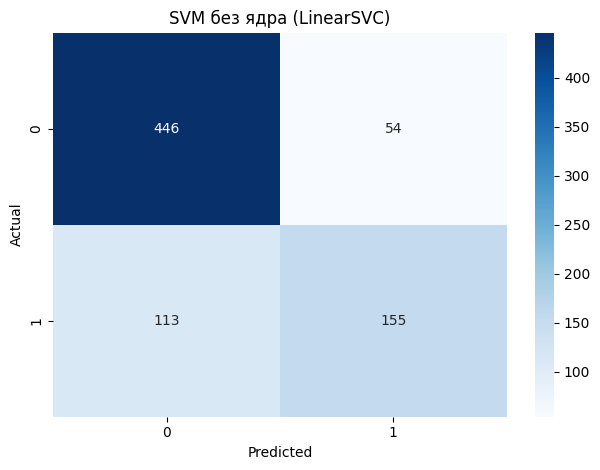

 SVM — линейное ядро
 Accuracy:  0.7734
 F1-score:  0.6360
 Precision: 0.7238
 Recall:    0.5672


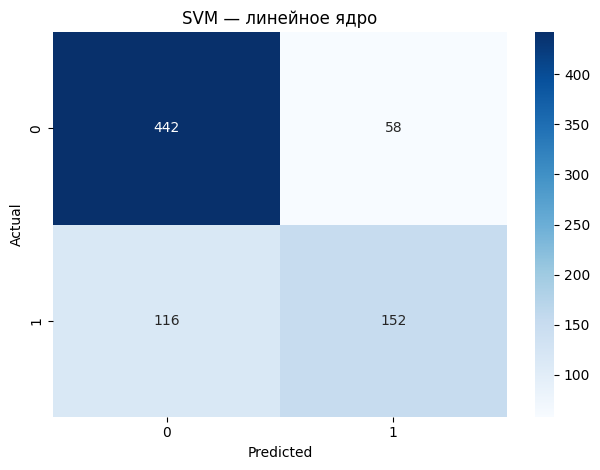

 SVM — гауссово ядро (RBF)
 Accuracy:  0.8242
 F1-score:  0.7158
 Precision: 0.8213
 Recall:    0.6343


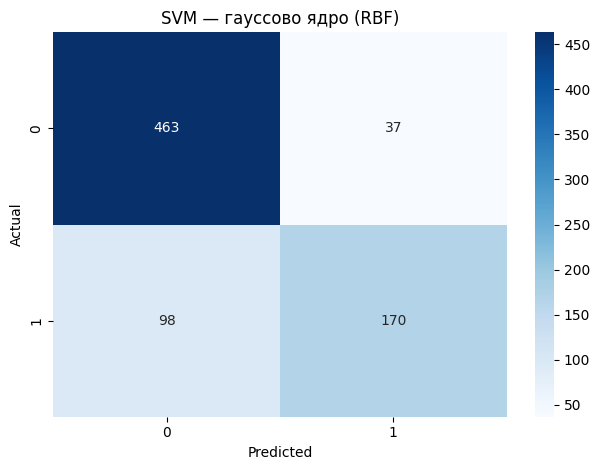

 SVM — полиномиальное ядро (degree=3)
 Accuracy:  0.8047
 F1-score:  0.6394
 Precision: 0.8986
 Recall:    0.4963


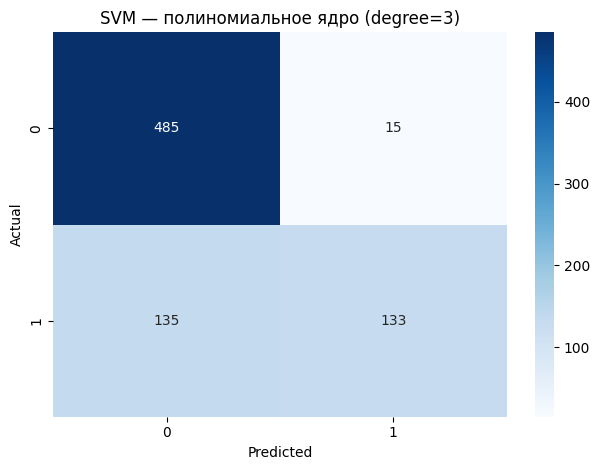

In [18]:
from sklearn.svm import SVC, LinearSVC

# 1.1 Без ядра (LinearSVC — SVM без явного kernel trick)
acc, f1 = evaluate('SVM без ядра (LinearSVC)', LinearSVC(max_iter=5000, C=0.5), X_scaled, y)
results.append({'Модель': 'SVM без ядра', 'Accuracy': acc, 'F1': f1})

# 1.2 С линейным ядром
acc, f1 = evaluate('SVM — линейное ядро', SVC(kernel='linear', C=0.5), X_scaled, y)
results.append({'Модель': 'SVM linear', 'Accuracy': acc, 'F1': f1})

# 1.3 С гауссовым ядром (RBF)
acc, f1 = evaluate('SVM — гауссово ядро (RBF)', SVC(kernel='rbf', C=1.0, gamma='scale'), X_scaled, y)
results.append({'Модель': 'SVM RBF', 'Accuracy': acc, 'F1': f1})

# 1.4 С полиномиальным ядром
acc, f1 = evaluate('SVM — полиномиальное ядро (degree=3)', SVC(kernel='poly', degree=3, C=1.0), X_scaled, y)
results.append({'Модель': 'SVM poly', 'Accuracy': acc, 'F1': f1})

## 2. Метод ближайших соседей (KNN)

 KNN (k=5)
 Accuracy:  0.8320
 F1-score:  0.7446
 Precision: 0.7932
 Recall:    0.7015


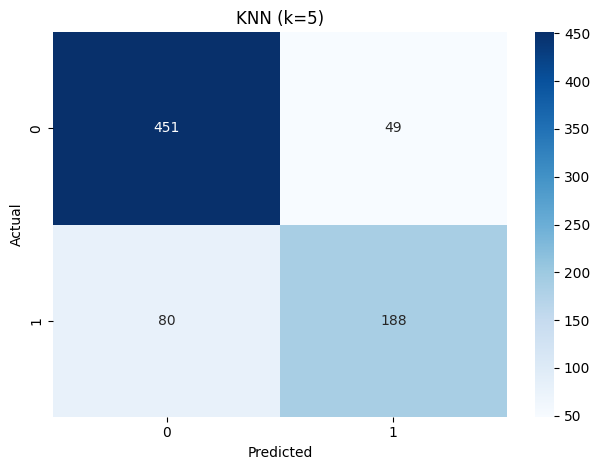

In [19]:
from sklearn.neighbors import KNeighborsClassifier

acc, f1 = evaluate('KNN (k=5)', KNeighborsClassifier(n_neighbors=5), X_scaled, y)
results.append({'Модель': 'KNN', 'Accuracy': acc, 'F1': f1})

## 3. Многослойный перцептрон (MLP)

 MLP (100-50)
 Accuracy:  1.0000
 F1-score:  1.0000
 Precision: 1.0000
 Recall:    1.0000


C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


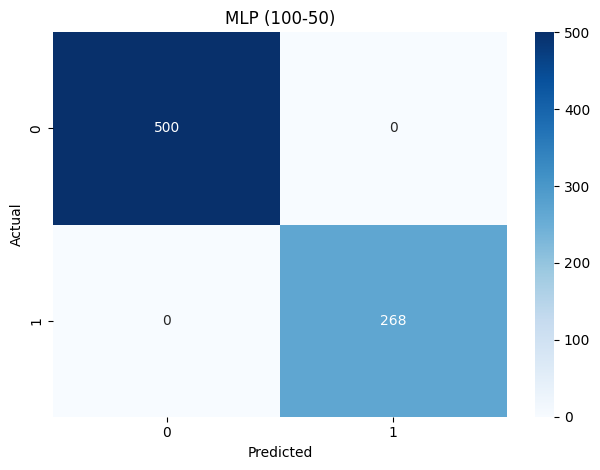

In [20]:
from sklearn.neural_network import MLPClassifier

acc, f1 = evaluate(
    'MLP (100-50)',
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    X_scaled, y
)
results.append({'Модель': 'MLP', 'Accuracy': acc, 'F1': f1})

## 4. Дерево решений

 Дерево решений (max_depth=5)
 Accuracy:  0.8372
 F1-score:  0.7535
 Precision: 0.7992
 Recall:    0.7127


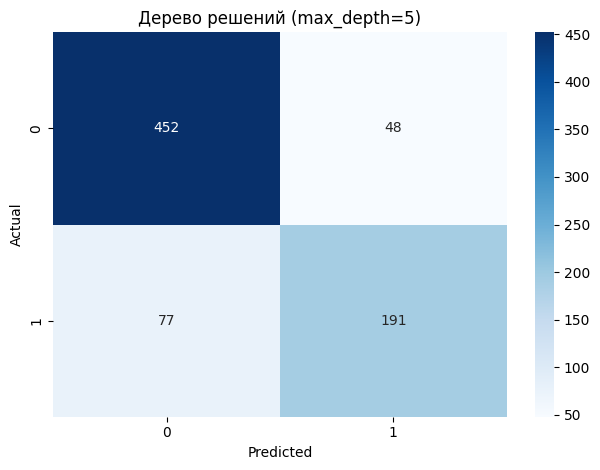

In [21]:
from sklearn.tree import DecisionTreeClassifier

acc, f1 = evaluate(
    'Дерево решений (max_depth=5)',
    DecisionTreeClassifier(max_depth=5, random_state=42),
    X, y  # деревья не требуют масштабирования
)
results.append({'Модель': 'Decision Tree', 'Accuracy': acc, 'F1': f1})

## 5. Наивный байесовский классификатор

 Наивный Байес (GaussianNB)
 Accuracy:  0.7630
 F1-score:  0.6445
 Precision: 0.6762
 Recall:    0.6157


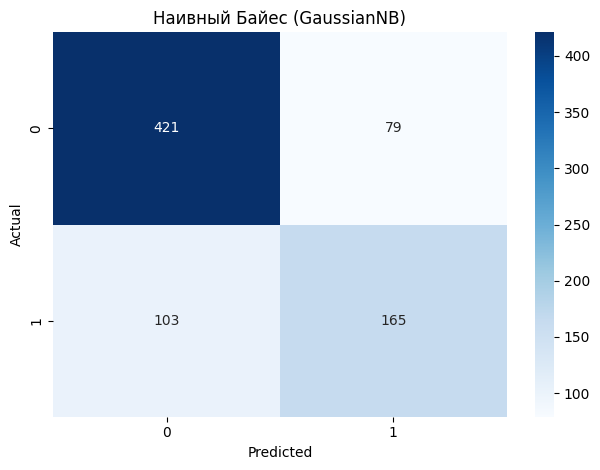

In [22]:
from sklearn.naive_bayes import GaussianNB

acc, f1 = evaluate('Наивный Байес (GaussianNB)', GaussianNB(), X, y)
results.append({'Модель': 'Naive Bayes', 'Accuracy': acc, 'F1': f1})

## 6. (*) Другие методы:

 Пассивно-агрессивный
 Accuracy:  0.7344
 F1-score:  0.5364
 Precision: 0.6860
 Recall:    0.4403


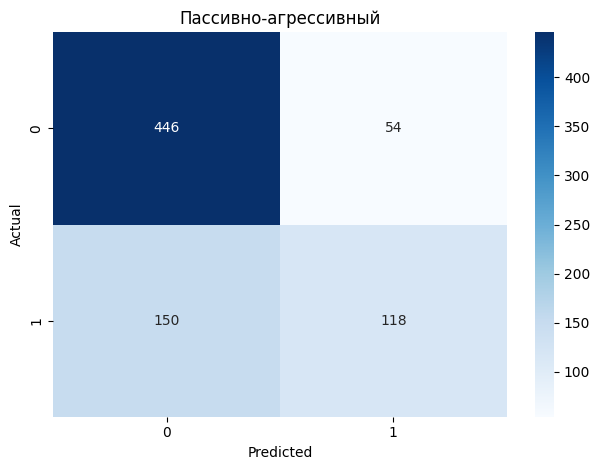

 Гребневый (Ridge)
 Accuracy:  0.7839
 F1-score:  0.6513
 Precision: 0.7452
 Recall:    0.5784


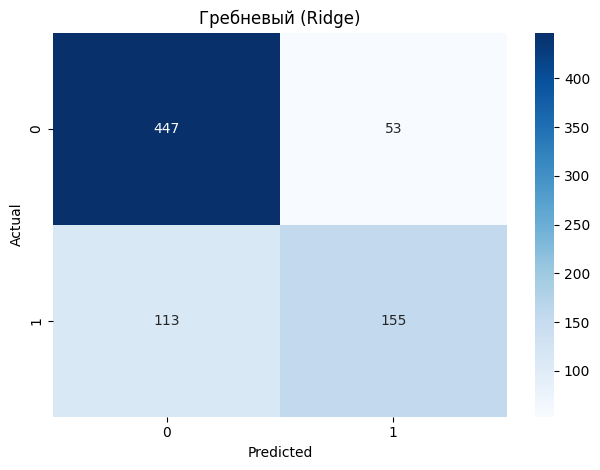

 Случайный лес (n=100)
 Accuracy:  1.0000
 F1-score:  1.0000
 Precision: 1.0000
 Recall:    1.0000


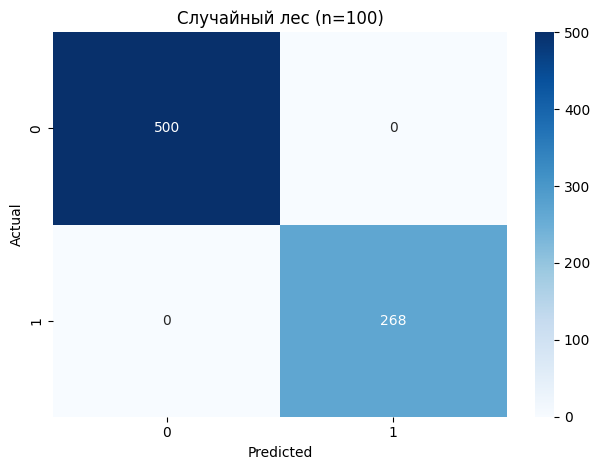

 Бэггинг (n=20)
 Accuracy:  0.9922
 F1-score:  0.9888
 Precision: 0.9925
 Recall:    0.9851


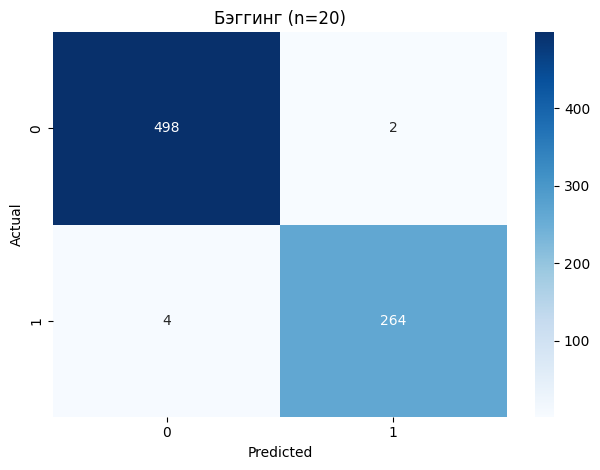

 Градиентный бустинг
 Accuracy:  0.9062
 F1-score:  0.8577
 Precision: 0.9118
 Recall:    0.8097


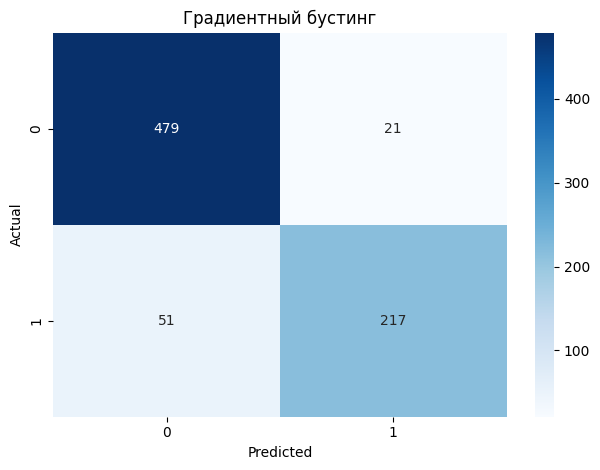

In [23]:
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 6.1 Пассивно-агрессивный классификатор
acc, f1 = evaluate('Пассивно-агрессивный', PassiveAggressiveClassifier(max_iter=1000, C=0.5), X_scaled, y)
results.append({'Модель': 'Passive-Aggressive', 'Accuracy': acc, 'F1': f1})

# 6.2 Гребневый классификатор
acc, f1 = evaluate('Гребневый (Ridge)', RidgeClassifier(alpha=1.0), X_scaled, y)
results.append({'Модель': 'Ridge', 'Accuracy': acc, 'F1': f1})

# 6.3 Случайный лес
acc, f1 = evaluate('Случайный лес (n=100)', RandomForestClassifier(n_estimators=100, random_state=42), X, y)
results.append({'Модель': 'Random Forest', 'Accuracy': acc, 'F1': f1})

# 6.4 Бэггинг
acc, f1 = evaluate('Бэггинг (n=20)', BaggingClassifier(n_estimators=20, random_state=42), X, y)
results.append({'Модель': 'Bagging', 'Accuracy': acc, 'F1': f1})

# 6.5 Градиентный бустинг
acc, f1 = evaluate('Градиентный бустинг', GradientBoostingClassifier(n_estimators=100, random_state=42), X, y)
results.append({'Модель': 'Gradient Boosting', 'Accuracy': acc, 'F1': f1})

## Сравнительная таблица всех моделей

            Модель Accuracy     F1
               MLP   1.0000 1.0000
     Random Forest   1.0000 1.0000
           Bagging   0.9922 0.9888
 Gradient Boosting   0.9062 0.8577
     Decision Tree   0.8372 0.7535
               KNN   0.8320 0.7446
           SVM RBF   0.8242 0.7158
          SVM poly   0.8047 0.6394
             Ridge   0.7839 0.6513
      SVM без ядра   0.7826 0.6499
        SVM linear   0.7734 0.6360
       Naive Bayes   0.7630 0.6445
Passive-Aggressive   0.7344 0.5364


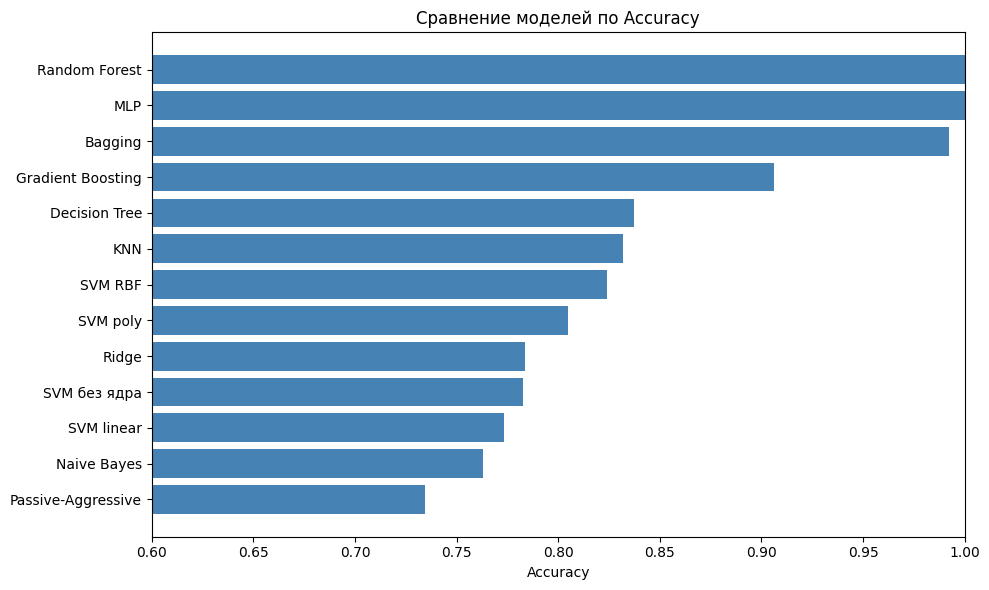

In [24]:
df_results = pd.DataFrame(results).sort_values('Accuracy', ascending=False).reset_index(drop=True)
df_results['Accuracy'] = df_results['Accuracy'].map('{:.4f}'.format)
df_results['F1'] = df_results['F1'].map('{:.4f}'.format)
print(df_results.to_string(index=False))

df_plot = pd.DataFrame(results).sort_values('Accuracy', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(df_plot['Модель'], df_plot['Accuracy'], color='steelblue')
plt.xlabel('Accuracy')
plt.title('Сравнение моделей по Accuracy')
plt.xlim(0.6, 1.0)
plt.tight_layout()
plt.show()